In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [4]:
path = untar_data(URLs.PLANET_SAMPLE)

In [29]:
path.ls()
path_img = path/'train'
path_img.ls()[:5]

[PosixPath('/root/.fastai/data/planet_sample/train/train_36622.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_18393.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_21168.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_12491.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_20168.jpg')]

In [0]:
df = pd.read_csv(path/'labels.csv')

In [0]:
src  = ImageList.from_csv(path,csv_name='labels.csv',folder='train',suffix='.jpg')

In [37]:
src.items

array(['/root/.fastai/data/planet_sample/train/train_21983.jpg',
       '/root/.fastai/data/planet_sample/train/train_9516.jpg',
       '/root/.fastai/data/planet_sample/train/train_12664.jpg',
       '/root/.fastai/data/planet_sample/train/train_36960.jpg', ...,
       '/root/.fastai/data/planet_sample/train/train_10311.jpg',
       '/root/.fastai/data/planet_sample/train/train_19080.jpg',
       '/root/.fastai/data/planet_sample/train/train_39339.jpg',
       '/root/.fastai/data/planet_sample/train/train_1934.jpg'], dtype='<U54')

In [39]:
src = src.split_by_rand_pct(0.2)
src

ItemLists;

Train: ImageList (800 items)
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
Path: /root/.fastai/data/planet_sample;

Valid: ImageList (200 items)
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
Path: /root/.fastai/data/planet_sample;

Test: None

In [41]:
src = src.label_from_df(label_delim = ' ')
src

LabelLists;

Train: LabelList (800 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
partly_cloudy;primary,clear;cultivation;primary;water,haze;primary,clear;primary,agriculture;clear;primary;road
Path: /root/.fastai/data/planet_sample;

Valid: LabelList (200 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
clear;primary,clear;primary,agriculture;clear;primary;water,clear;primary,agriculture;clear;habitation;primary;road
Path: /root/.fastai/data/planet_sample;

Test: None

In [46]:
img = open_image(path_img.ls()[0])
img.data.shape

torch.Size([3, 256, 256])

In [0]:
size = 256
def get_data(size,bs=48):
  return src.transform(get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.),size=size).databunch(bs=bs).normalize(imagenet_stats)

In [0]:
data = get_data(size=128)

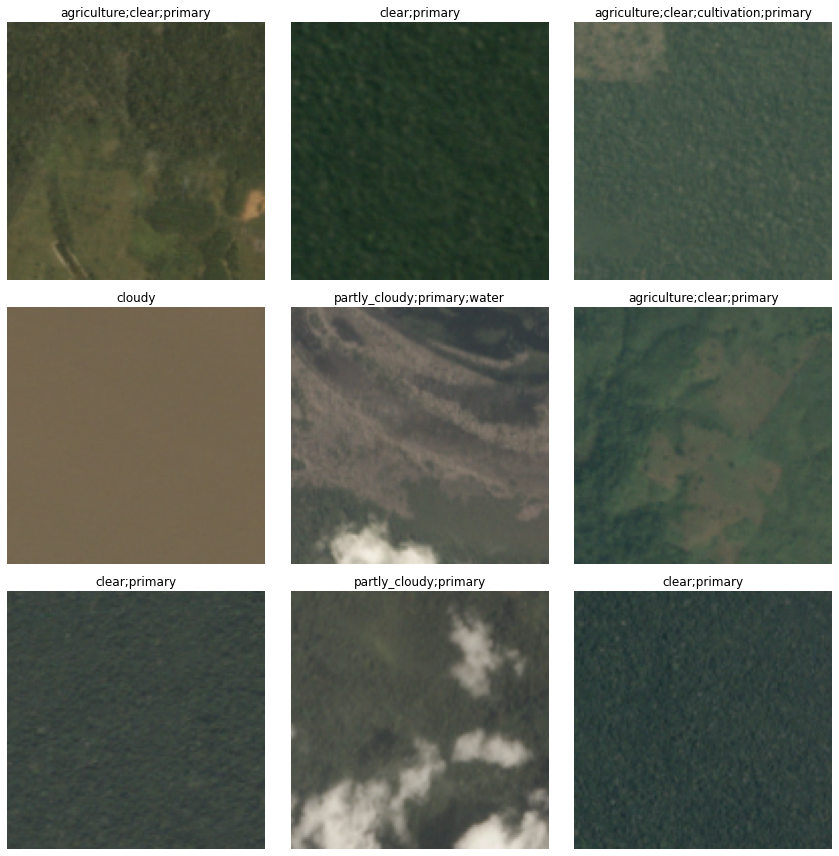

In [82]:
data.show_batch(3)

In [0]:
acc_02 = partial(accuracy_thresh,thresh=0.2)
fbeta_02 = partial(fbeta,thresh = 0.2)
metrics = [acc_02,fbeta_02]

In [84]:
learn = cnn_learner(data,models.resnet50,metrics=metrics)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


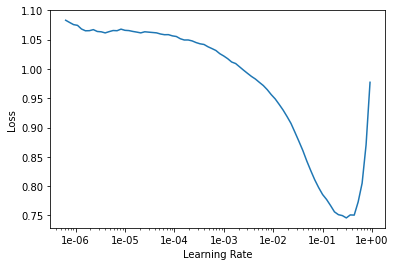

In [85]:
learn.lr_find()
learn.recorder.plot()

In [86]:
learn.fit_one_cycle(10,3e-02)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.848457,0.947792,0.412353,0.438983,00:03
1,0.574623,0.219534,0.916765,0.801927,00:03
2,0.405447,0.257537,0.870294,0.784211,00:03
3,0.327734,0.306296,0.894706,0.765721,00:03
4,0.274431,0.200363,0.908530,0.829434,00:03
5,0.236534,0.181052,0.922647,0.833493,00:03
6,0.206378,0.151334,0.934118,0.869396,00:03
7,0.178129,0.136967,0.936471,0.884242,00:03
8,0.156651,0.130362,0.940588,0.877339,00:03
9,0.143917,0.129254,0.942647,0.881147,00:03


In [0]:
learn.save('small-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


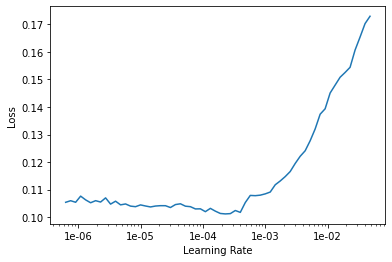

In [88]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [89]:
learn.fit_one_cycle(8,slice(1e-06,1e-04))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.104636,0.128545,0.941177,0.875382,00:03
1,0.105035,0.127060,0.940294,0.880414,00:03
2,0.106595,0.127219,0.943235,0.882499,00:03
3,0.105238,0.128250,0.943824,0.880701,00:03
4,0.103663,0.125843,0.943824,0.882081,00:03
5,0.098438,0.126236,0.942353,0.880502,00:03
6,0.096007,0.125392,0.942941,0.883243,00:03
7,0.095585,0.125245,0.942941,0.882741,00:03


In [0]:
learn.save('small-2')

In [0]:
data = get_data(size=256)
learn.data=data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


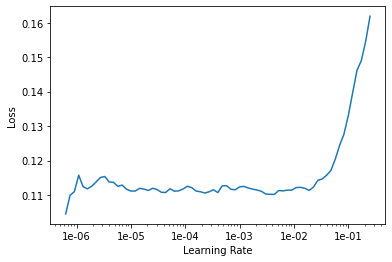

In [92]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [93]:
learn.fit_one_cycle(8,1e-02)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.110099,0.134658,0.947353,0.883378,00:07
1,0.121770,0.161527,0.940588,0.857492,00:06
2,0.119517,0.163447,0.937941,0.860590,00:06
3,0.122538,0.199843,0.928824,0.850218,00:06
4,0.121560,0.137494,0.938235,0.876333,00:06
5,0.113805,0.131395,0.945588,0.880114,00:06
6,0.104134,0.121704,0.945588,0.884840,00:06
7,0.097882,0.122635,0.945882,0.886129,00:06


In [0]:
learn.save('Big-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


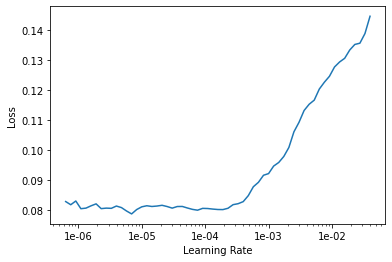

In [95]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(skip_end = 15)

In [96]:
learn.fit_one_cycle(8,slice(3e-06,2e-04))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.084053,0.123534,0.945882,0.884983,00:07
1,0.082620,0.121548,0.948529,0.895210,00:07
2,0.081605,0.117106,0.949118,0.894507,00:07
3,0.078440,0.119966,0.948824,0.892388,00:07
4,0.077060,0.126901,0.948235,0.884854,00:07
5,0.075562,0.122586,0.948235,0.886240,00:07
6,0.073672,0.122627,0.949118,0.891521,00:07
7,0.072004,0.121320,0.948235,0.890545,00:07
